<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/CIFAR10_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 classification

In [ ]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
from sklearn.model_selection import train_test_split

# for importing data
import torchvision
import torchvision.transforms as T
from torch.utils.data import TensorDataset,DataLoader

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Import and inspect the data

In [ ]:
# download the CIFAR10 dataset

cdata = torchvision.datasets.CIFAR10(root= 'cifar10', download= True)

print(cdata)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10/cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [ ]:
# inspect the data

# the categories (but how many letters??)
print(cdata.classes)
print(str(len(cdata.classes)) + ' classes')

print('\nData size:')
print(cdata.data.shape)

# .targets is a list of targets converted to ints
print(len(cdata.targets))
print(type(cdata.data))

# Creating variables for data reshaping
numPics = cdata.data.shape[0]
numPixels = cdata.data.shape[1]
numChans = cdata.data.shape[3]

# transform to 4D tensor for conv layers (and transform from int8 to float)
# images = cdata.data.view([numPics,numChans,numPixels,numPixels]).float()
# print('\nTensor data:')
# print(images.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10 classes

Data size:
(50000, 32, 32, 3)
50000
<class 'numpy.ndarray'>


<class 'torchvision.transforms.transforms.Compose'>
Data Shape:  (32, 32, 3)


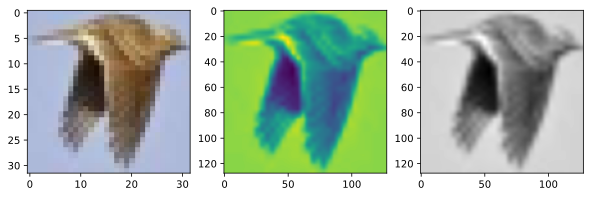

In [ ]:
Ts = T.Compose([T.ToTensor(),   # Compose function group together some transformers into one object
                T.Resize(32*4),
                T.Grayscale(num_output_channels= 1)
                ])
print(type(Ts))

# include the transform in the dataset
cdata.transform = Ts

print('Data Shape: ',cdata.data[123,:,:,:].shape)

# option 1: apply transform "externally" to an image
imageno = 123
img1 = Ts(cdata.data[imageno,:,:,:])

# option 2 : use the embedded transform
img2 = cdata.transform(cdata.data[imageno,:,:,:])

# let's see what we've done!
fig, ax = plt.subplots(1,3, figsize= (10, 3))
ax[0].imshow(cdata.data[imageno,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2), cmap= 'gray')

plt.show()

In [ ]:
print(type(img2))

<class 'torch.Tensor'>


In [ ]:
print(cdata.data.shape)

(50000, 32, 32, 3)


In [ ]:
# Creating variables for data reshaping
numPics = cdata.data.shape[0]
numPixels = cdata.data.shape[1]
numChans = cdata.data.shape[3]



<class 'int'>


## Change the type of data to Tensor in 4Dimensions


In [ ]:
print(cdata)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [ ]:
print(cdata.data.shape)

(50000, 32, 32, 3)


In [ ]:
print(type(cdata.data))

<class 'numpy.ndarray'>


In [ ]:
# Converting numpy array to torch Tensor
cdataT = torch.from_numpy(cdata.data)
print(type(cdataT))

<class 'torch.Tensor'>


In [ ]:
# Check the shape of the torch
print(cdataT.shape)

torch.Size([50000, 32, 32, 3])


In [ ]:
# Convert the shape to (Number of pics, number of channels, Number of H pixels, Number of W pixels)

numPics = cdataT.data.shape[0]
numPixels = cdataT.data.shape[1]
numChans = cdataT.data.shape[3]

# print(numPics)
# print(numPixels)
# print(numChans)
print('Original data Shape:\n',cdataT.data.shape)

images = cdataT.data.reshape([numPics, numChans, numPixels, numPixels]).float()
print('\nTensor data:\n',images.shape)

Original data Shape:
 torch.Size([50000, 32, 32, 3])

Tensor data:
 torch.Size([50000, 3, 32, 32])


In [ ]:

print(len(cdata.targets))
print(type(cdata.targets))
print(type(cdata.targets[0]))

50000
<class 'list'>
<class 'int'>


In [ ]:
# Converting the targets to torch tensor
labelsT = torch.tensor(cdata.targets)
print(type(labelsT))
print(labelsT.shape)

<class 'torch.Tensor'>
torch.Size([50000])


In [ ]:
# Finding the final label for the pics
for i in range(10):
    print(cdata.classes[cdata.targets[i]])

frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat


In [ ]:
random_list = np.random.randint(1, 100, 10)
random_list

array([71, 93, 34, 92, 70, 93, 68, 70, 21, 36])

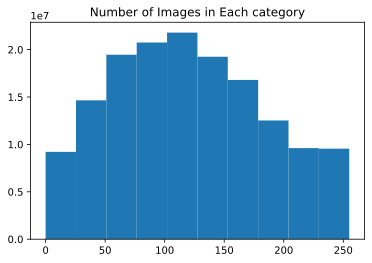

In [ ]:
# make a visualization of the number of images in each category
plt.hist(images[:,:,:,:].view(1,-1).detach(), 10)
plt.title('Number of Images in Each category')
plt.show()

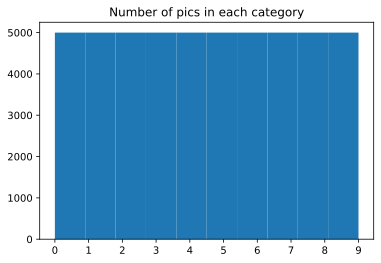

In [ ]:
plt.hist(labelsT.view(1,-1).detach(), 10)
plt.title('Number of pics in each category')
plt.xticks(ticks = range(0,10))
plt.show()

# Program start

In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import copy
from sklearn.model_selection import train_test_split

# for importing data
import torchvision
import torchvision.transforms as T
from torch.utils.data import TensorDataset,DataLoader

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
# download the CIFAR10 dataset

cdata = torchvision.datasets.CIFAR10(root= 'cifar10', download= True)

print(cdata)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10/cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [4]:
# inspect the data

# the categories (but how many letters??)
print(cdata.classes)
print(str(len(cdata.classes)) + ' classes')

print('\nData size:')
print(cdata.data.shape)

# .targets is a list of targets converted to ints
print(len(cdata.targets))
print(type(cdata.data))

# Creating variables for data reshaping
numPics = cdata.data.shape[0]
numPixels = cdata.data.shape[1]
numChans = cdata.data.shape[3]

# Converting numpy array to torch Tensor
cdataT = torch.from_numpy(cdata.data)
print(type(cdataT))

# Convert the shape to (Number of pics, number of channels, Number of H pixels, Number of W pixels)

print('\nOriginal data Shape:\n',cdataT.data.shape)


images = cdataT.data.reshape([numPics, numChans, numPixels, numPixels]).float()
print('\nTensor data:\n',images.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10 classes

Data size:
(50000, 32, 32, 3)
50000
<class 'numpy.ndarray'>
<class 'torch.Tensor'>

Original data Shape:
 torch.Size([50000, 32, 32, 3])

Tensor data:
 torch.Size([50000, 3, 32, 32])


In [8]:
# Converting the targets to torch tensor
labelsT = torch.tensor(cdata.targets).long()
print(type(labelsT))
print(labelsT.shape)
print(torch.unique(labelsT))

<class 'torch.Tensor'>
torch.Size([50000])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [6]:
# Finding the final label for the pics
random_list = np.random.randint(1, 100, 10)
for i in random_list:
    print(cdata.classes[cdata.targets[i]])

automobile
airplane
automobile
horse
bird
deer
truck
horse
deer
airplane


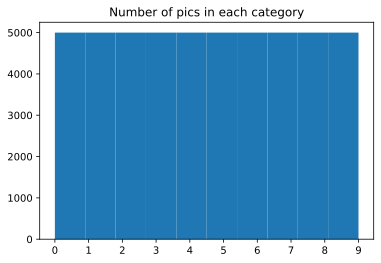

In [7]:
plt.hist(labelsT.view(1,-1).detach(), 10)
plt.title('Number of pics in each category')
plt.xticks(ticks = range(0,10))
plt.show()

## Create train/test groups using DataLoader

In [19]:
train_data, test_data, train_labels, test_labels = train_test_split(images, labelsT, test_size= 0.1)

# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [20]:
# checking the size of train data and train labels

print(len(next(iter(train_loader))[0]))
print(len(next(iter(train_loader))[1]))
# print(next(iter(train_loader)))
train_loader.dataset.tensors[0].shape

32
32


torch.Size([45000, 3, 32, 32])